In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import redes_neurais
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# importando dataset
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# separando X e y
X = df.iloc[:, range(8)]
y = df.iloc[:,[8]]

In [4]:
X.head()

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y.head()

,8
0,1
1,0
2,1
3,0
4,1


In [6]:
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [8]:
# preprocessando input
X_std = np.copy(X)
for i in range(X_std.shape[1]):
    X_std[:,i] = (X[i] - X[i].mean())/X[i].std()

y = df[8]
y = np.where(y == 0, -1, 1)

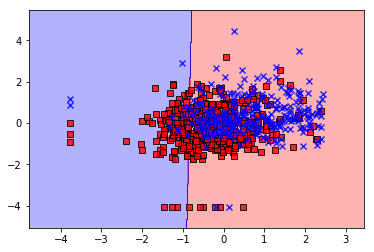

In [9]:

perceptron = redes_neurais.Perceptron()
perceptron.fit(X_std[:,[0,7]], y)
plot_decision_regions(X_std[:,[1,5]], y, perceptron)

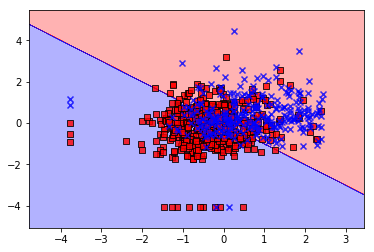

In [10]:
adalineGD = redes_neurais.AdalineGD()
adalineGD.fit(X_std[:,[0,7]], y)
plot_decision_regions(X_std[:,[1,5]], y, adalineGD)

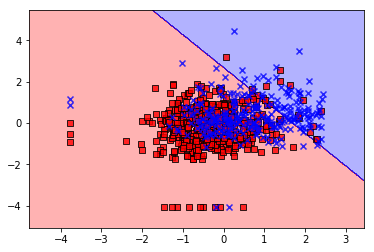

In [11]:
adalineSGD = redes_neurais.AdalineSGD()
adalineSGD.fit(X_std[:,[0,7]], y)
plot_decision_regions(X_std[:,[1,5]], y, adalineSGD)

In [12]:
kf = KFold(n_splits=3)

In [15]:
accuracy_perceptron = []
accuracy_adalineGD = []
accuracy_adalineSGD = []
accuracy_LR = []
accuracy_knn = []
accuracy_nb = []
accuracy_svm = []

for train_index, test_index in kf.split(X):
    
    perceptron = redes_neurais.Perceptron()
    perceptron.fit(X_std[train_index],y[train_index])
    y_pred_perceptron = perceptron.predict(X_std[test_index])
    accuracy_perceptron.append(metrics.accuracy_score(y[test_index], y_pred_perceptron))
    
    adalineGD = redes_neurais.AdalineGD()
    adalineGD.fit(X_std[train_index],y[train_index])
    y_pred_adalineGD = adalineGD.predict(X_std[test_index])
    accuracy_adalineGD.append(metrics.accuracy_score(y[test_index], y_pred_adalineGD))

    adalineSGD = redes_neurais.AdalineSGD()
    adalineSGD.fit(X_std[train_index],y[train_index])
    y_pred_adalineSGD = adalineSGD.predict(X_std[test_index])
    accuracy_adalineSGD.append(metrics.accuracy_score(y[test_index], y_pred_adalineSGD))

    LR = LogisticRegression()
    LR.fit(X_std[train_index],y[train_index])
    y_pred_lr = LR.predict(X_std[test_index])
    accuracy_LR.append(metrics.accuracy_score(y[test_index], y_pred_lr))
    
    knn = KNeighborsClassifier()
    knn.fit(X_std[train_index], y[train_index])
    y_pred_knn = knn.predict(X_std[test_index])
    accuracy_knn.append(metrics.accuracy_score(y[test_index], y_pred_knn))
    
    nb = GaussianNB()
    nb.fit(X_std[train_index],y[train_index])
    y_pred_nb = nb.predict(X_std[test_index])
    accuracy_nb.append(metrics.accuracy_score(y[test_index], y_pred_nb))
    
    svm = SVC()
    svm.fit(X_std[train_index], y[train_index])
    y_pred_svm = svm.predict(X_std[test_index])
    accuracy_svm.append(metrics.accuracy_score(y[test_index], y_pred_svm))
    
print(np.mean(accuracy_perceptron))
print(np.mean(accuracy_adalineGD))
print(np.mean(accuracy_adalineSGD))
print(np.mean(accuracy_LR))
print(np.mean(accuracy_knn))
print(np.mean(accuracy_nb))
print(np.mean(accuracy_svm))

0.6927083333333334
0.328125
0.7565104166666666
0.7760416666666666
0.7291666666666666
0.7447916666666666
0.7721354166666666


### Explique as diferenças entre o Adaline com Gradiente Descendente em Batch e o Adaline com Gradiente Descendente Estocástico.

A diferença entre Gradiente Descendente em Batch para o Gradiente Descendente Estocástico é que no estocástico o algoritmo irá realizando o treinamento de tupla a tupla em cada época do algortimo. o Em batch, o algoritmo considera o dataset como um todo, de uma só vez.